In [1]:

# libraries
!pip install wordcloud
import warnings
import random

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# nlp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import TfidfTransformer

# training model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
youtube = pd.read_csv('Youtube04-Eminem.csv')


In [3]:
youtube

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [4]:
youtube.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [5]:
youtube.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0
447,z13tsbc5vvn0hdozz04chjt51lq1cvris0k,Gaming Gaming,2015-05-06T10:56:35.972000,857.482.940 views AWESOME !!!!!!!!!!!!!!!!!!!!...,0


In [6]:
youtube.shape

(448, 5)

In [7]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  448 non-null    object
 1   AUTHOR      448 non-null    object
 2   DATE        203 non-null    object
 3   CONTENT     448 non-null    object
 4   CLASS       448 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


In [8]:
youtube.describe()

,CLASS
count,448.000000
mean,0.546875
std,0.498354
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
youtube.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

In [10]:
youtube.drop('DATE',inplace=True,axis=1)

In [11]:
youtube.isnull().sum()

COMMENT_ID    0
AUTHOR        0
CONTENT       0
CLASS         0
dtype: int64

In [12]:
youtube.duplicated().sum()

2

In [13]:
youtube.drop_duplicates(inplace=True)

In [14]:
youtube.duplicated().sum()

0

In [15]:
# Text Cleaning
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

In [16]:



# Tokenization
def tokenize_text(text):
    return word_tokenize(text)


In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Stopword Removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]



[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [18]:
import pandas as pd

# Load data
youtube = pd.read_csv('Youtube04-Eminem.csv')
youtube.drop('DATE', inplace=True, axis=1)
youtube.drop_duplicates(inplace=True)
data1 = youtube[['CONTENT','CLASS']]


In [19]:


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Stopword Removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]



[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re  # Import the re module for regular expressions

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



# Apply text preprocessing steps
data1['CLEANED_CONTENT'] = data1['CONTENT'].apply(clean_text)
data1['TOKENIZED_CONTENT'] = data1['CLEANED_CONTENT'].apply(word_tokenize)
data1['CONTENT_NO_STOPWORDS'] = data1['TOKENIZED_CONTENT'].apply(remove_stopwords)
data1['LEM_TOKENIZED_CONTENT'] = data1['TOKENIZED_CONTENT'].apply(lemmatize_tokens)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\Sure Pavan\AppData\Local\Temp\ipykernel_8640\4048907340.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CLEANED_CONTENT'] = data1['CONTENT'].apply(clean_text)


In [21]:
youtube.CLASS.value_counts()

CLASS
1    243
0    203
Name: count, dtype: int64

In [22]:
youtube

,COMMENT_ID,AUTHOR,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,Rihanna looks so beautiful with red hair ;)﻿,0


In [23]:
data1 = youtube[['CONTENT','CLASS']]
data1.head()

,CONTENT,CLASS
0,+447935454150 lovely girl talk to me xxx﻿,1
1,I always end up coming back to this song<br />﻿,0
2,"my sister just received over 6,500 new <a rel=...",1
3,Cool﻿,0
4,Hello I&#39;am from Palastine﻿,1


The comment:  The perfect example of abuse from husbands and the thing is I&#39;m a feminist so I definitely agree with this song and well...if I see this someone&#39;s going to die! Just sayin.﻿


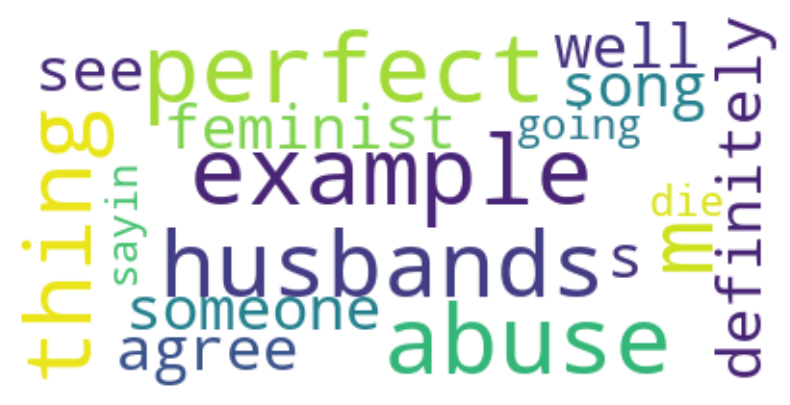

In [24]:
# NOT SPAM Example
text = data1.CONTENT[13]
print("The comment: ",text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The comment:  Alright ladies, if you like this song, then check out John Rage.  He&#39;s a smoking hot rapper coming into the game.  He&#39;s not better than Eminem lyrically, but he&#39;s hotter. Hear some of his songs on my channel.﻿


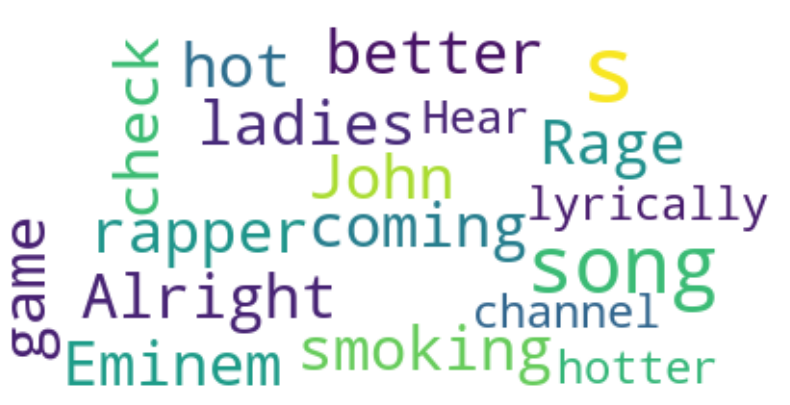

In [25]:
# SPAM Example
text = data1.CONTENT[12]
print("The comment: ",text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

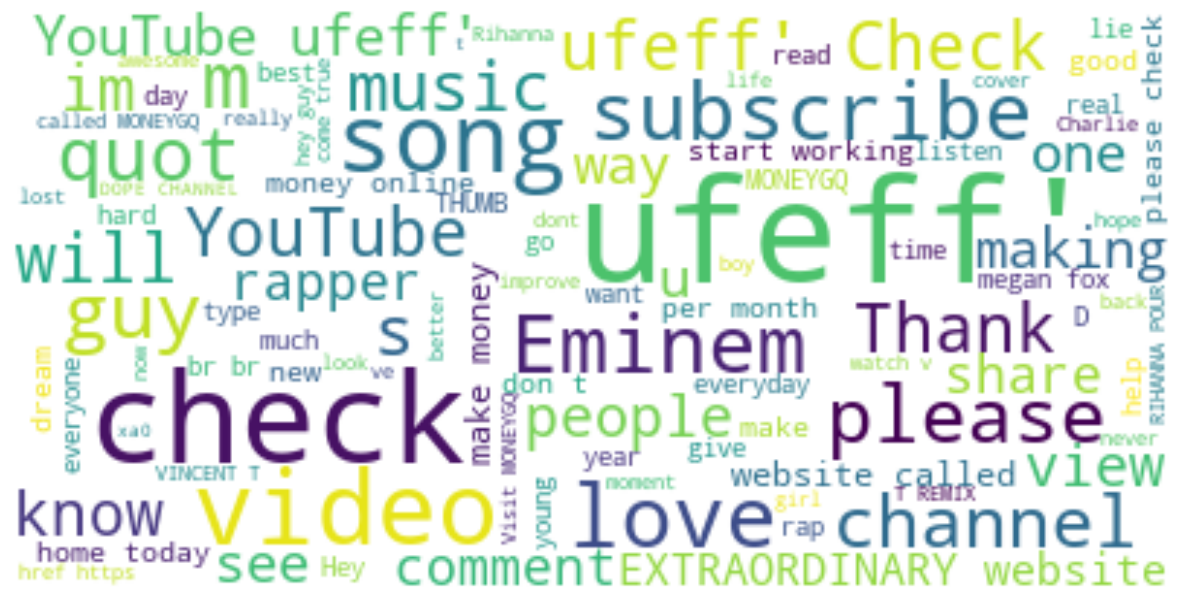

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(list(data1['CONTENT'])))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\Sure Pavan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


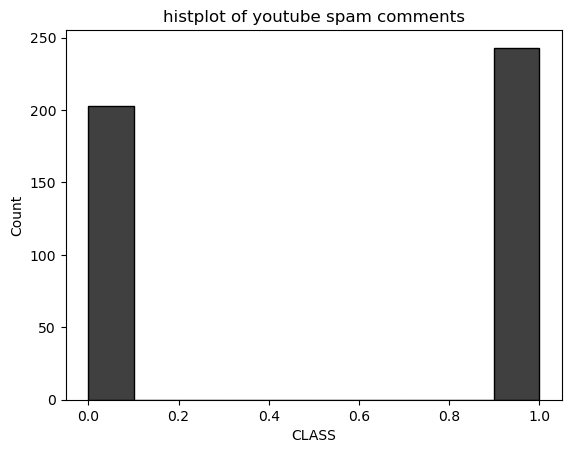

In [27]:
sns.histplot(x=data1["CLASS"],data=data1,color='k')
plt.title("histplot of youtube spam comments");

In [28]:
X = np.array(data1["CONTENT"])
y = np.array(data1["CLASS"])

cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [29]:
X_train

<356x1602 sparse matrix of type '<class 'numpy.int64'>'
	with 6041 stored elements in Compressed Sparse Row format>

In [30]:
y_train

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

# Random Fores Algorithm

In [31]:
from sklearn.metrics import mean_squared_error,classification_report

In [32]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=150)

In [33]:
random.fit(X_train, y_train)


RandomForestClassifier(random_state=150)

In [34]:
pred=random.predict(X_test)

In [35]:
score1=accuracy_score(y_test,pred)

In [36]:
print(score1)

0.9333333333333333


In [37]:

mse1=mean_squared_error(pred,y_test)
print(mse1)

0.06666666666666667


In [38]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.91      0.95      0.93        44

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



# Decision Tree Algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree=DecisionTreeClassifier()

In [41]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_tr=tree.predict(X_test)

In [43]:
score2=accuracy_score(y_test,y_tr)

In [44]:
print(score2)

0.9222222222222223


In [45]:
mse2=mean_squared_error(y_tr,y_test)
print(mse2)

0.07777777777777778


In [46]:
print(classification_report(y_tr,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.89      0.95      0.92        43

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



# BernoulliNB

In [47]:
model = BernoulliNB() 

In [48]:
model.fit(X_train, y_train)

BernoulliNB()

In [49]:
y_br=model.predict(X_test)

In [50]:
score2=accuracy_score(y_br,y_test)

In [51]:
print(score2)

0.7666666666666667


In [52]:
mse3=mean_squared_error(y_br,y_test)
print(mse3)

0.23333333333333334


In [53]:
print(classification_report(y_br,y_test))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80        63
           1       0.57      0.96      0.71        27

    accuracy                           0.77        90
   macro avg       0.77      0.82      0.76        90
weighted avg       0.85      0.77      0.78        90



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logreg = LogisticRegression()


In [56]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_lr = logreg.predict(X_test)

In [58]:
from sklearn import metrics
score4=metrics.accuracy_score(y_test, y_lr)
print(score4)

0.9333333333333333


In [59]:
mse4=mean_squared_error(y_lr,y_test)
print(mse4)

0.06666666666666667


In [60]:
print(classification_report(y_lr,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.91      0.95      0.93        44

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



# Support vector machine

In [61]:
from sklearn.svm import SVC

In [62]:
support=SVC()

In [63]:
support.fit(X_train,y_train)

SVC()

In [64]:
y_sv=support.predict(X_test)

In [65]:
mse5=mean_squared_error(y_sv,y_test)
score5=accuracy_score(y_sv,y_test)
print(mse5)
print(score5)

0.07777777777777778
0.9222222222222223


In [66]:
print(classification_report(y_sv,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.89      0.95      0.92        43

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [67]:
len(data1.query('CLASS == 1'))

243

In [68]:
len(data1.query('CLASS == 0'))

203

In [69]:
len(data1)

446

In [70]:
# Combining all datasets

yspam= pd.concat([pd.read_csv("Youtube01-Psy.csv"),
                  pd.read_csv("Youtube02-KatyPerry.csv"),
                  pd.read_csv("Youtube03-LMFAO.csv"),
                  pd.read_csv("Youtube04-Eminem.csv"),
                  pd.read_csv("Youtube05-Shakira.csv")])

In [71]:
yspam.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [72]:
len(yspam)

1956

In [73]:
print("Spam comments: ",len(yspam.query('CLASS == 1')))
print("Not spam comments: ",len(yspam.query('CLASS == 0')))

Spam comments:  1005
Not spam comments:  951


In [74]:

data_shuff = yspam.sample(frac=1)
d_comments = data_shuff['CONTENT']
d_labels = data_shuff['CLASS']

In [75]:
# setting up a pipeline

pipeline = Pipeline([('bag-of-words',CountVectorizer()),
                     ('random-forest', RandomForestClassifier())])

pipeline

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random-forest', RandomForestClassifier())])

In [76]:
# fitting the model

pipeline.fit(d_comments[:1500], d_labels[:1500])

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random-forest', RandomForestClassifier())])

In [77]:
pipeline.score(d_comments[1500:], d_labels[1500:])

0.9627192982456141

In [78]:
import joblib

joblib.dump(pipeline, "model4.pkl")

['model4.pkl']

In [79]:
pipeline.predict(["Click here fore more"])

array([0], dtype=int64)

In [80]:
pipeline.predict(["I loved this song!"])

array([0], dtype=int64)

In [86]:
pipeline.predict(["+447935454150 lovely girl talk to me"])

array([1], dtype=int64)

In [82]:
pipeline.predict(["my sister just received over 6,500 new..."])

array([1], dtype=int64)

In [83]:
pipeline_2 = make_pipeline(CountVectorizer(),
                           TfidfTransformer(norm=None),
                           RandomForestClassifier())

pipeline_2

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer(norm=None)),
                ('randomforestclassifier', RandomForestClassifier())])

In [84]:
scores_pip2 = cross_val_score(pipeline_2, d_comments, d_labels,cv=5)

# average score
print("Accuracy: ", scores_pip2.mean(), scores_pip2.std() * 2)

Accuracy:  0.9550106999321469 0.007643577410498019


In [85]:
pipeline_2.steps

[('countvectorizer', CountVectorizer()),
 ('tfidftransformer', TfidfTransformer(norm=None)),
 ('randomforestclassifier', RandomForestClassifier())]